# H&M's Group Project

## Anwering the question: How has the total number of Space Missions changed over time? (1957-2022)
### Sections:
- Total Space Missions Over Time - Worldwide
- Total Space Missions Over Time - USA only
- Total Space Missions Over Time - Top 3 Countries
- Could NASA's budget since it's birth, be affecting the number of Space Missions Over Time for the US?
- Space Race Timeline and other Historical Events during this Time Period

In [1]:
# Bring in the Dependencies
import pandas as pd 
import numpy as np
import hvplot.pandas
from unidecode import unidecode
import matplotlib.pyplot as plt

In [2]:
file_path = "Resources/SpaceMission_Merged.csv"
encoding =  "ISO-8859-1"
missions_df = pd.read_csv(file_path, encoding=encoding)

#File path for Nasa's Budget csv
file_path_budget = "Resources/Nasa_Budget_ConstantDlls.csv"
budget_df = pd.read_csv(file_path_budget)

#File path for Country-Lat-Lon-Missions csv
file_path_worldmap = "Resources/Country_LatLon_Missions.csv"
world_map_missions = pd.read_csv(file_path_worldmap)


In [3]:
#show the DataFrame sample
missions_df.head()

,Company,Date,Time,Rocket,Mission,RocketStatus,MissionStatus,Day/Night Launch,Complex ID,Launch Site,Territory,Country
0,US Navy,1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
1,AMBA,1958-02-01,03:48:00,Juno I,Explorer 1,Retired,Success,Night,LC-26A,Cape Canaveral AFS,Florida,USA
2,US Navy,1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
3,AMBA,1958-03-05,18:27:00,Juno I,Explorer 2,Retired,Failure,Night,LC-26A,Cape Canaveral AFS,Florida,USA
4,US Navy,1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,Success,Day,LC-18A,Cape Canaveral AFS,Florida,USA


In [4]:
#Check the dtypes for this DataFrame
missions_df.dtypes

Company             object
Date                object
Time                object
Rocket              object
Mission             object
RocketStatus        object
MissionStatus       object
Day/Night Launch    object
Complex ID          object
Launch Site         object
Territory           object
Country             object
dtype: object

To answer the question of how many space missions have happened over time, we have to
change the datatype of column 'Date', into datetime.


In [5]:
# Convert 'Date' column to datetime format
missions_df['Date'] = pd.to_datetime(missions_df['Date'])

In [6]:
#Check the dtypes to confirm the Date to datetime change
missions_df.dtypes

Company                     object
Date                datetime64[ns]
Time                        object
Rocket                      object
Mission                     object
RocketStatus                object
MissionStatus               object
Day/Night Launch            object
Complex ID                  object
Launch Site                 object
Territory                   object
Country                     object
dtype: object

## Space Missions Over Time

In [7]:
# Extract year from the 'Date' column using the dt accessor with .year for the year component
# and create a 'Year' column to store those values
missions_df['Year'] = missions_df['Date'].dt.year

# Set the 'Year' column as the index of the DataFrame
missions_df.set_index('Year', inplace=True)

In [8]:
#Show the modified DataFrame displaying the 'Year' column
missions_df.head()

,Company,Date,Time,Rocket,Mission,RocketStatus,MissionStatus,Day/Night Launch,Complex ID,Launch Site,Territory,Country
Year,,,,,,,,,,,,
1957,US Navy,1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
1958,AMBA,1958-02-01,03:48:00,Juno I,Explorer 1,Retired,Success,Night,LC-26A,Cape Canaveral AFS,Florida,USA
1958,US Navy,1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
1958,AMBA,1958-03-05,18:27:00,Juno I,Explorer 2,Retired,Failure,Night,LC-26A,Cape Canaveral AFS,Florida,USA
1958,US Navy,1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,Success,Day,LC-18A,Cape Canaveral AFS,Florida,USA


In [9]:
# Get the unique values of the 'Year' column
unique_years = missions_df.index.unique()

print(unique_years)

Index([1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int32', name='Year')


In [10]:
# Apply groupby to DataFrame by year, and count the number of missions for each year
missions_by_year = missions_df.groupby('Year').size()

In [11]:
# Find the first and last year in the dataset
first_year = unique_years.min()
current_year = unique_years.max()

# Print the information
print(f"Space Missions in this Dataset start from {first_year} - {current_year}")


Space Missions in this Dataset start from 1957 - 2022


In [12]:
# Get unique values from the 'Country' column
unique_countries = missions_df['Country'].unique()

# Print the unique countries
print(unique_countries)

['USA' 'Kazakhstan' 'Russia' 'France' 'Japan' 'Kenya' 'Australia' 'China'
 'India' 'Israel' 'Gran Canaria' 'Brazil' 'Barents Sea' 'North Korea'
 'Pacific Ocean' 'Iran' 'South Korea' 'New Zealand']


In [13]:
#Make a copy of the dataframe
missions_percountry1 = missions_df.copy()

In [14]:
# Group the dataframe by 'Country' and aggregate missions into a list
missions_by_country = missions_percountry1.groupby('Country').size().reset_index(name='Missions')

#Set the country index 
missions_by_country = missions_by_country.set_index('Country')

#Sort the Missions column in descending order
missions_by_country = missions_by_country.sort_values(by='Missions', ascending=False)

# Display the dataframe
missions_by_country

,Missions
Country,
USA,1472
Russia,1416
Kazakhstan,719
China,368
France,318
Japan,130
India,82
Pacific Ocean,36
New Zealand,28


In [15]:
# Calculate the size of points based on the number of missions
world_map_missions['Point_Size'] = world_map_missions['Missions']

# Create the hvplot
plot = world_map_missions.hvplot.points(
    'Longitude',
    'Latitude', 
    s='Missions', 
    color='Country',
    scale= 0.8,
    hover_cols=['Country', 'Missions'], 
    title='Number of Missions per Country (1957-2022)', 
    xlabel='Longitude', 
    ylabel='Latitude',
    geo = True, 
    tiles="OSM",
    frame_width = 800,
    frame_height = 600)

# Show the plot
plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Country,Missions)

Total number of Space Missions Worldwide (1957-2022): 4630


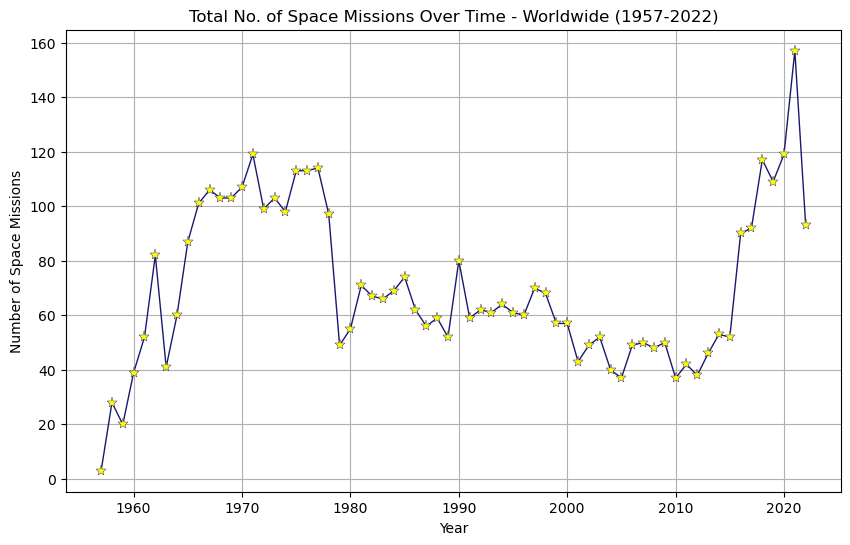

In [16]:
# Plot total number of missions over time
plt.figure(figsize=(10, 6))
missions_by_year.plot(kind='line', marker='*', color='MidnightBlue', 
                      markerfacecolor='yellow', linewidth=1, markersize=8, 
                      markeredgewidth=0.3)
plt.title('Total No. of Space Missions Over Time - Worldwide (1957-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Space Missions')
plt.grid(True)

# Count the total number of missions worldwide
total_missions_worldwide = len(missions_df)
print(f'Total number of Space Missions Worldwide (1957-2022): {total_missions_worldwide}')

# Save the figure
plt.savefig("output_data/Ttl_SMOT_World.png")

plt.show()

## Total Space Missions Over Time for the USA only


In [17]:
# Create a new DataFrame where the missions are pertaining the 'USA' only
usa_missions_by_year = missions_df[missions_df['Country'] == 'USA']

usa_missions_by_year.head()

,Company,Date,Time,Rocket,Mission,RocketStatus,MissionStatus,Day/Night Launch,Complex ID,Launch Site,Territory,Country
Year,,,,,,,,,,,,
1957,US Navy,1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
1958,AMBA,1958-02-01,03:48:00,Juno I,Explorer 1,Retired,Success,Night,LC-26A,Cape Canaveral AFS,Florida,USA
1958,US Navy,1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
1958,AMBA,1958-03-05,18:27:00,Juno I,Explorer 2,Retired,Failure,Night,LC-26A,Cape Canaveral AFS,Florida,USA
1958,US Navy,1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,Success,Day,LC-18A,Cape Canaveral AFS,Florida,USA


In [18]:
# Groupby the USA launches DataFrame by year, and count the number of launches for each year
missions_per_year = usa_missions_by_year.groupby('Year').size()

# Convert the Series to a DataFrame
missions_per_year_df = missions_per_year.reset_index(name='Number of Missions')

# Display the DataFrame
print("Number of missions per year:")
missions_per_year_df

Number of missions per year:


,Year,Number of Missions
0,1957,1
1,1958,23
2,1959,16
3,1960,30
4,1961,43
...,...,...
61,2018,34
62,2019,27
63,2020,42
64,2021,57


In [19]:
# Save the DataFrame to a CSV file for better viewing to display in the slide presentation
missions_per_year_df.to_csv('Resources/SpaceMissions_USAperYear.csv', index=False)

In [20]:
# To proceed and plot only missions pertaining to the 'USA' over time
# Groupby the USA launches DataFrame by year, and count the number of launches for each year
usa_missions_grouped = usa_missions_by_year.groupby('Year').size()

Total number of Space Missions USA only (1957-2022): 1472


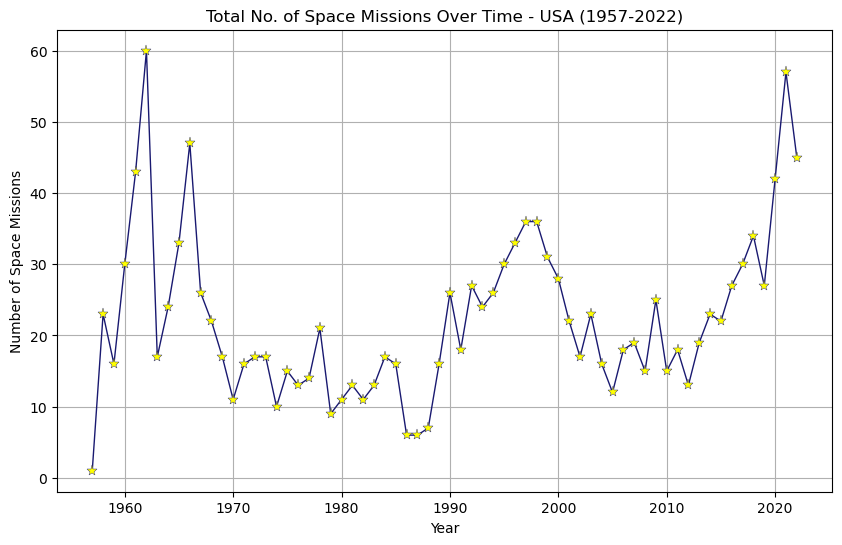

In [21]:
# Plot the total number of missions over time for USA launches
plt.figure(figsize=(10, 6))
usa_missions_grouped.plot(kind='line', marker='*', color='MidnightBlue', 
                                  markerfacecolor='yellow', linewidth=1, markersize=8, 
                                  markeredgewidth=0.3)
plt.title('Total No. of Space Missions Over Time - USA (1957-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Space Missions')
plt.grid(True)

# Count the total number of missions for the USA
total_missions_usa = len(usa_missions_by_year)
print(f'Total number of Space Missions USA only (1957-2022): {total_missions_usa}')

# Save the figure
plt.savefig("output_data/Ttl_SMOT_USA.png")

plt.show()

## Total Space Missions Over Time - Rest of the World
### (excluding USA)

In [22]:
#Make a copy of the missions_df dataframe to avoid changing values when dropping 'Territory' column
rotw_missions_df = missions_df.copy()

In [23]:
# Create a DataFrame containing data for countries other than the USA
rotw_missions = rotw_missions_df[rotw_missions_df['Country'] != 'USA']

# Drop the 'Territory' column in the copy of the original DataFrame
rotw_missions_df = rotw_missions.drop(columns=['Territory'])

# Show the new cleaned DataFrame
rotw_missions_df.head()

,Company,Date,Time,Rocket,Mission,RocketStatus,MissionStatus,Day/Night Launch,Complex ID,Launch Site,Country
Year,,,,,,,,,,,
1957,RVSN USSR,1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,Success,Night,Site 1/5,Baikonur Cosmodrome,Kazakhstan
1957,RVSN USSR,1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,Success,Night,Site 1/5,Baikonur Cosmodrome,Kazakhstan
1958,RVSN USSR,1958-04-27,09:01:00,Sputnik 8A91,Sputnik-3 #1,Retired,Failure,Day,Site 1/5,Baikonur Cosmodrome,Kazakhstan
1958,RVSN USSR,1958-05-15,07:12:00,Sputnik 8A91,Sputnik-3 #2,Retired,Success,Day,Site 1/5,Baikonur Cosmodrome,Kazakhstan
1958,RVSN USSR,1958-09-23,07:40:00,Vostok,E-1 na A1 (Luna-1),Retired,Failure,Day,Site 1/5,Baikonur Cosmodrome,Kazakhstan


In [24]:
# To proceed and plot the rest of the world, excluding USA, over time
# Groupby the ROTW space missions DataFrame by year, and count the # of missions/year
rotw_missions_grouped = rotw_missions.groupby('Year').size()

Total number of Space Missions Worldwide excluding USA (1957-2022): 3158


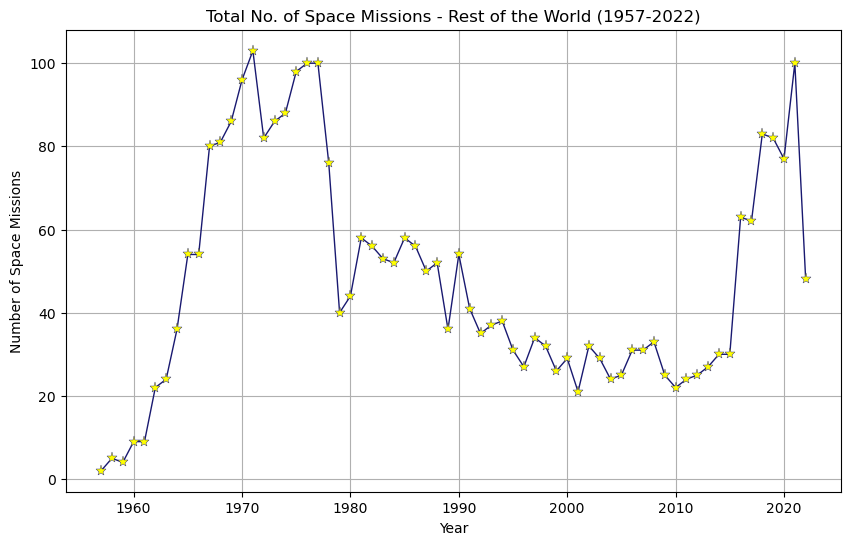

In [25]:
# Plot the total # of space missions over time for the rest of the world excluding USA
plt.figure(figsize=(10, 6))
rotw_missions_grouped.plot(kind='line', marker='*', color='MidnightBlue', 
                      markerfacecolor='yellow', linewidth=1, markersize=8, 
                      markeredgewidth=0.3)
plt.title('Total No. of Space Missions - Rest of the World (1957-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Space Missions')
plt.grid(True)

# Count the total number of missions for the rest of the world
total_missions_rotw = len(rotw_missions)
print(f'Total number of Space Missions Worldwide excluding USA (1957-2022): {total_missions_rotw}')

# Save the figure
plt.savefig("output_data/Ttl_SMOT_ROTW.png")

plt.show()

## Top 3 countries with the most space missions, and their changes over time

In [26]:
# Make a copy of the dataframe before resetting the index
top_3_countries = missions_df.copy()

In [27]:
# Group DataFrame by 'Country', count the number of missions, and reset the index
missions_per_country = top_3_countries['Country'].value_counts().reset_index(name='Missions')

# Rename columns for clarity
missions_per_country.columns = ['Country', 'Missions']

# Select the top 3 countries with the most missions
top_3_countries = missions_per_country.head(3)

top_3_countries

,Country,Missions
0,USA,1472
1,Russia,1416
2,Kazakhstan,719


In [28]:
# Merge top 3 countries' data with the original DataFrame to get missions for those countries only
#This is the new DF 'top_3_countries_missions' is the one needed for the following graph
top_3_countries_missions = missions_df[missions_df['Country'].isin(top_3_countries['Country'])]

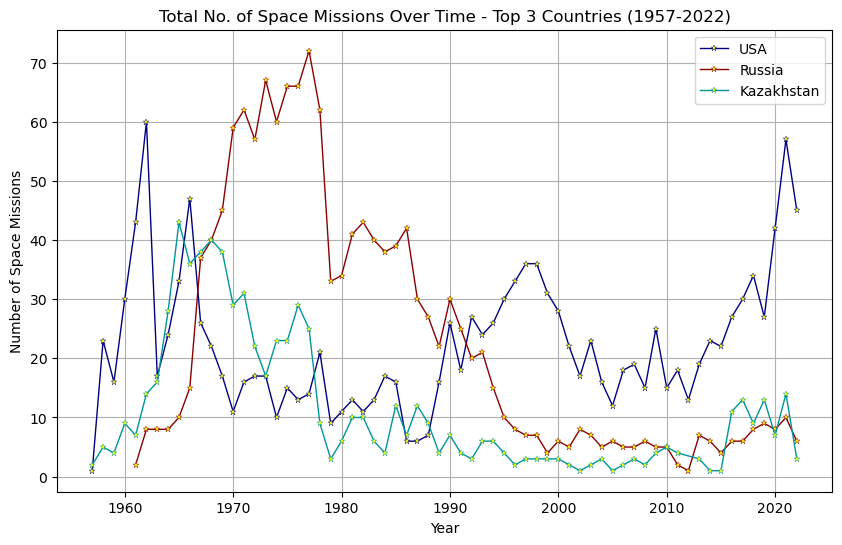

In [29]:
# Define colors and labels for each country
country_colors = {'USA': 'Navy', 'Russia': 'DarkRed', 'Kazakhstan': '#009699'}
country_labels = {'USA': 'USA', 'Russia': 'Russia', 'Kazakhstan': 'Kazakhstan'}

# Plot the total number of missions over time for the top 3 countries
plt.figure(figsize=(10, 6))

# Loop through each country in the top 3 and plot its missions over the years
for country in top_3_countries['Country']:
    country_missions = top_3_countries_missions[top_3_countries_missions['Country'] == country]
    country_missions_grouped = country_missions.groupby('Year').size()
    country_color = country_colors[country]
    country_label = country_labels[country]
    country_missions_grouped.plot(kind='line', marker='*', color=country_color, 
                                  markerfacecolor='yellow', linewidth=1, markersize=5, 
                                  markeredgewidth=0.3, label=country_label)

plt.title('Total No. of Space Missions Over Time - Top 3 Countries (1957-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Space Missions')
plt.legend()  # Add legend to differentiate countries
plt.grid(True)

# Save the figure
plt.savefig("output_data/Ttl_SMOT_TOP3.png")

plt.show()

In [30]:
# Pivot table for displaying the number of missions per year for the top 3 countries
#Using the aggregation function for the pivot table to count the number of missions per country per year.
missions_per_country_year = top_3_countries_missions.pivot_table(index='Year', columns='Country', aggfunc='size', fill_value=0)

# Reorder the columns so they show as in the previous DataFrame (They appear in alphabetical order by default). 
missions_per_country_year = missions_per_country_year[['USA', 'Russia', 'Kazakhstan']]

# Display the DataFrame
missions_per_country_year

Country,USA,Russia,Kazakhstan
Year,,,
1957,1,0,2
1958,23,0,5
1959,16,0,4
1960,30,0,9
1961,43,2,7
...,...,...,...
2018,34,8,9
2019,27,9,13
2020,42,8,7


## Could NASA’s Budget over time, be affecting the Number of Missions?

In [31]:
#Display a sample of the budget csv file
budget_df.head()

,Year,2022 Constant Dollars(Millions)
0,1958,903
1,1959,1456
2,1960,3967
3,1961,7286
4,1962,12161


In [32]:
# Rename the column '2022 Constant Dollars(Millions)' to 'Budget'
budget_df.rename(columns={'2022 Constant Dollars(Millions)': 'Budget'}, inplace=True)

# Set the index of the DataFrame to the 'Year' column
budget_df.set_index('Year', inplace=True)

# Show a sample of the changed DataFrame
budget_df.head()

,Budget
Year,
1958,903
1959,1456
1960,3967
1961,7286
1962,12161


In [33]:
# Make a copy of the dataframe before resetting the index
US_budget_vs_missions = usa_missions_by_year.copy()

In [34]:
# Group by year and count the number of missions for each year
missions_per_year = US_budget_vs_missions.groupby('Year').size()

# Create a new DataFrame with the number of missions per year
new_missions_df = pd.DataFrame(missions_per_year, columns=['Number of Missions'])

# Display the DataFrame
new_missions_df

,Number of Missions
Year,
1957,1
1958,23
1959,16
1960,30
1961,43
...,...
2018,34
2019,27
2020,42


In [35]:
# Group by year and count the number of missions for each year
missions_per_year = US_budget_vs_missions.groupby('Year').size()

# Create a new DataFrame with the number of missions per year
new_missions_df = pd.DataFrame(missions_per_year, columns=['Number of Missions'])

# Merge the budget DataFrame with the new DataFrame on the 'Year' column
new_missions_df = pd.merge(new_missions_df, budget_df, how='left', on='Year')

# Drop rows with NaN values
new_missions_df.dropna(inplace=True)

# Display the DataFrame
new_missions_df

,Number of Missions,Budget
Year,,
1958,23,903.0
1959,16,1456.0
1960,30,3967.0
1961,43,7286.0
1962,60,12161.0
...,...,...
2016,27,23534.0
2017,30,23290.0
2018,34,24165.0


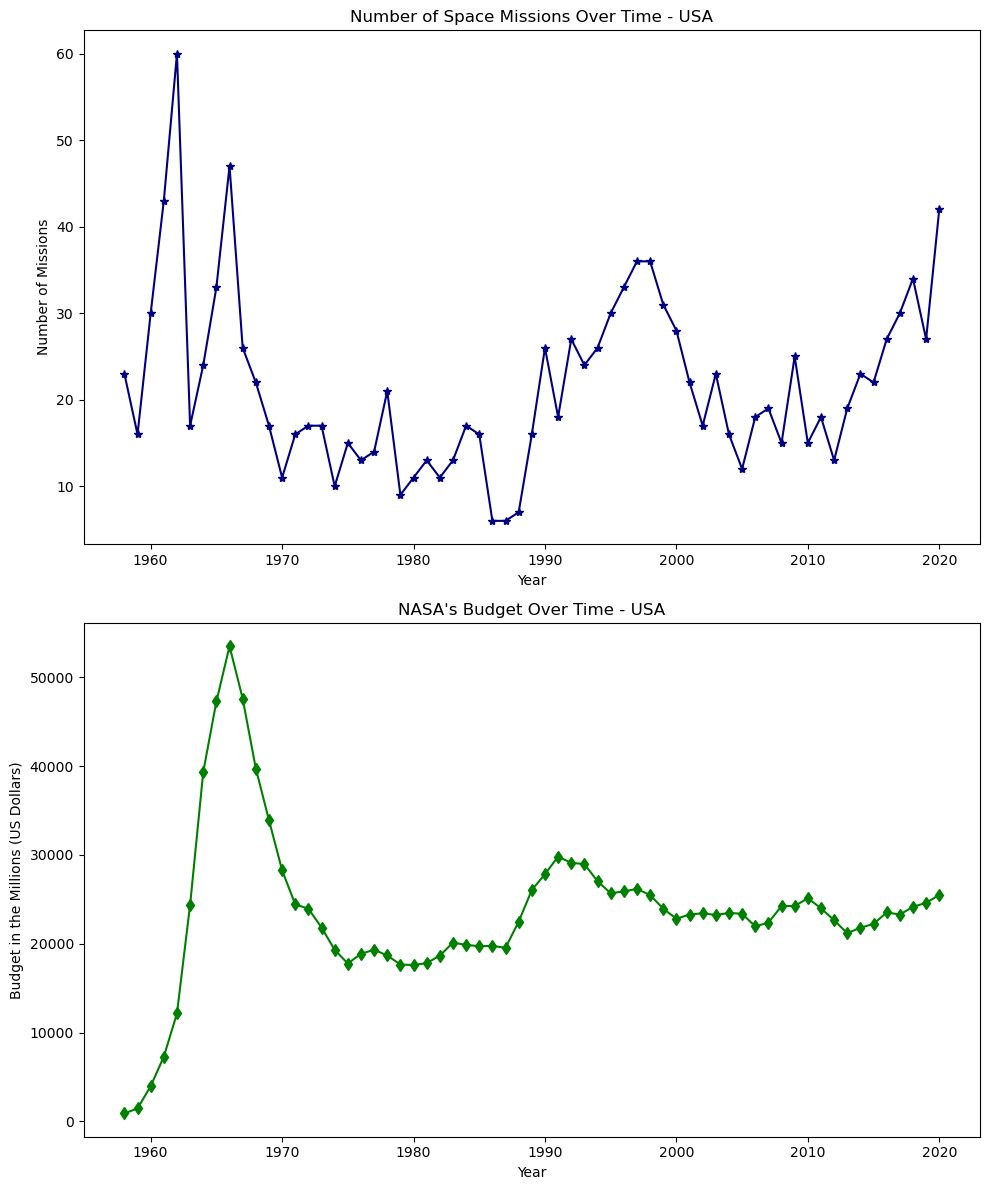

In [36]:
# Create a figure and axis objects with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Define colors and labels for each variable
colors = {'Number of Missions': 'Navy', 'Budget': 'Green'}
labels = {'Number of Missions': 'Number of Missions', 'Budget': 'Budget'}

# Plot Number of Missions
ax1.plot(new_missions_df.index, new_missions_df['Number of Missions'], marker='*', color=colors['Number of Missions'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Missions')
ax1.set_title('Number of Space Missions Over Time - USA')

# Plot Budget
ax2.plot(new_missions_df.index, new_missions_df['Budget'], marker='d', color=colors['Budget'])
ax2.set_xlabel('Year')
ax2.set_ylabel('Budget in the Millions (US Dollars)')
ax2.set_title("NASA's Budget Over Time - USA")

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Ttl_SP_vs_Budget1.png")

# Show plot
plt.show()

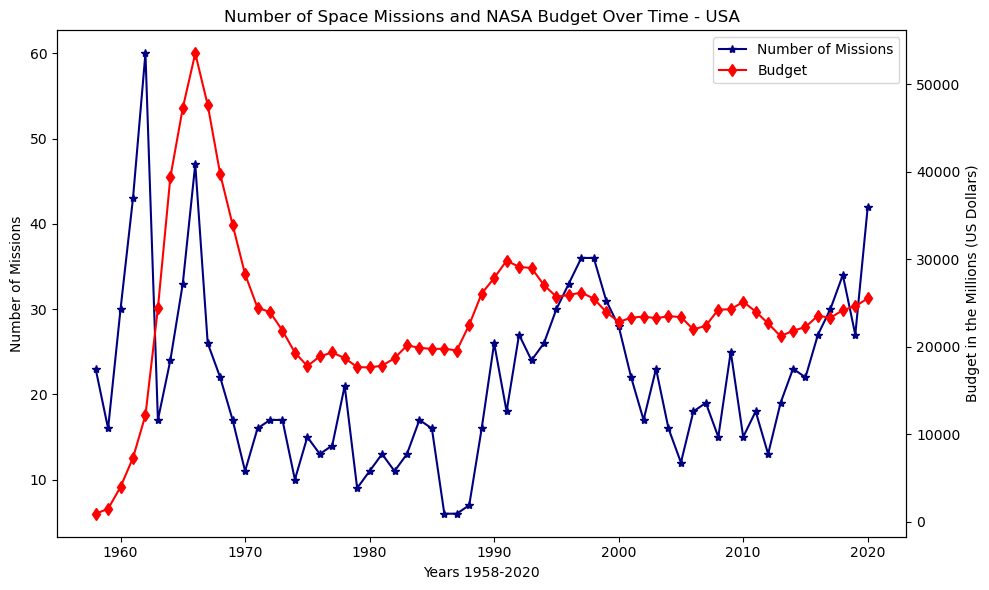

In [37]:
#Creating a dual axis plot to better display the line charts to see their trend

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define colors and labels for each variable
colors = {'Number of Missions': 'navy', 'Budget': 'red'}
labels = {'Number of Missions': 'Number of Missions', 'Budget': 'Budget'}

# Plot the Number of Missions over time
ax1.plot(new_missions_df.index, new_missions_df['Number of Missions'], marker='*', color=colors['Number of Missions'], label=labels['Number of Missions'])
ax1.set_xlabel('Years 1958-2020')
ax1.set_ylabel('Number of Missions')
ax1.set_title('Number of Space Missions and NASA Budget Over Time - USA')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the Budget over time
ax2.plot(new_missions_df.index, new_missions_df['Budget'], marker='d', color=colors['Budget'], label=labels['Budget'])
ax2.set_ylabel('Budget in the Millions (US Dollars)')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Ttl_SP_vs_Budget2.png")

# Show plot
plt.show()

The trend of both timelines seems to be pretty related to one another.
Further analysis in relation to funding by private companies might be a factor towards space missions in the last decade.

CSV for Nasa's Historical Budget created using the following resources:
https://en.wikipedia.org/wiki/Budget_of_NASA

In [38]:
new_missions_df.dtypes

Number of Missions      int64
Budget                float64
dtype: object

In [39]:
# Make a copy of the previous dataframe so that you can make calculations and formating without affecting previous dataframes
US_budget_missions_AvPer = new_missions_df.copy()

# Show copy
US_budget_missions_AvPer

,Number of Missions,Budget
Year,,
1958,23,903.0
1959,16,1456.0
1960,30,3967.0
1961,43,7286.0
1962,60,12161.0
...,...,...
2016,27,23534.0
2017,30,23290.0
2018,34,24165.0


In [40]:
US_budget_missions_AvPer.dtypes

Number of Missions      int64
Budget                float64
dtype: object

In [41]:
# Only use this code if you need to modify calculations after the fact that you have formatted the columns otherwise, skip
# US_budget_missions_AvPer['Budget'] = pd.to_numeric(US_budget_missions_AvPer['Budget'].astype(str).str.replace('$', ''), errors='coerce')
# US_budget_missions_AvPer['Avg. Budget per Mission (Millions)'] = pd.to_numeric(US_budget_missions_AvPer['Avg. Budget per Mission (Millions)'].astype(str).str.replace('$', ''), errors='coerce')
# US_budget_missions_AvPer['Budget % per Mission (Millions)'] = pd.to_numeric(US_budget_missions_AvPer['Budget % per Mission (Millions)'].astype(str).str.replace('%', ''), errors='coerce')

In [42]:
# Only use this line of code if the previous one had to be applied
# US_budget_missions_AvPer.dtypes

In [43]:
# Create a new DataFrame with the 'Average budget per mission' and 'Budget % per mission'
# Calculate the % of budget spent per mission
US_budget_missions_AvPer['Avg. Budget per Mission (Millions)'] = " "
US_budget_missions_AvPer['Budget % per Mission (Millions)'] = " "
for mission in US_budget_missions_AvPer:
    US_budget_missions_AvPer['Avg. Budget per Mission (Millions)'] = US_budget_missions_AvPer['Budget']/US_budget_missions_AvPer['Number of Missions']
    US_budget_missions_AvPer['Budget % per Mission (Millions)'] = (US_budget_missions_AvPer['Avg. Budget per Mission (Millions)'] / US_budget_missions_AvPer['Budget']) * 100

# Display the DataFrame with the added columns
US_budget_missions_AvPer

,Number of Missions,Budget,Avg. Budget per Mission (Millions),Budget % per Mission (Millions)
Year,,,,
1958,23,903.0,39.260870,4.347826
1959,16,1456.0,91.000000,6.250000
1960,30,3967.0,132.233333,3.333333
1961,43,7286.0,169.441860,2.325581
1962,60,12161.0,202.683333,1.666667
...,...,...,...,...
2016,27,23534.0,871.629630,3.703704
2017,30,23290.0,776.333333,3.333333
2018,34,24165.0,710.735294,2.941176


In [44]:
# Make a copy of the previous DataFrame, so that you can make edits in formatting without affecting values later
Formatted_US_BMAP_df = US_budget_missions_AvPer.copy()


In [45]:
Formatted_US_BMAP_df.dtypes

Number of Missions                      int64
Budget                                float64
Avg. Budget per Mission (Millions)    float64
Budget % per Mission (Millions)       float64
dtype: object

In [46]:
# Only use this code if dtype needs to be modified
# columns_to_convert = ["Budget", "Avg. Budget per Mission (Millions)", "Budget % per Mission (Millions)"]

# Convert specified columns to integers
# Formatted_US_BMAP_df[columns_to_convert] = Formatted_US_BMAP_df[columns_to_convert].astype(int, errors='raise')

In [47]:
# NOTE: If you run this cell, and need to do modifications after editing, you will have to remove $ and % values first
# Then you will have to check the dtypes and make sure the values in the columns to change are switched from object/string to int or float
# Note that making a copy before formatting helps. Consider also that the code in cells that show as commented are part of this process
# Once you format values, they turn into string thus they cannot be used as numeric to make calculations

# Round the numeric columns
Formatted_US_BMAP_df['Avg. Budget per Mission (Millions)'] = Formatted_US_BMAP_df['Avg. Budget per Mission (Millions)'].round()
Formatted_US_BMAP_df['Budget % per Mission (Millions)'] = Formatted_US_BMAP_df['Budget % per Mission (Millions)'].round(2)

# Format the columns with $ sign
Formatted_US_BMAP_df['Budget'] = Formatted_US_BMAP_df['Budget'].map("${:,.1f}".format)
Formatted_US_BMAP_df['Avg. Budget per Mission (Millions)'] = Formatted_US_BMAP_df['Avg. Budget per Mission (Millions)'].map("${:,.1f}".format)

# Format the Budget % per Mission column to only 2 decimals
Formatted_US_BMAP_df['Budget % per Mission (Millions)'] = Formatted_US_BMAP_df['Budget % per Mission (Millions)'].map("{:,.2f}%".format)

# Rename columns 'Number of Missions' and 'Budget' to have the word 'Total' before.
Formatted_US_BMAP_df = Formatted_US_BMAP_df.rename(columns={'Number of Missions': 'Total Number of Missions', 'Budget': 'Total Budget (Millions)'})

# Show final Formatted DataFrame
Formatted_US_BMAP_df


,Total Number of Missions,Total Budget (Millions),Avg. Budget per Mission (Millions),Budget % per Mission (Millions)
Year,,,,
1958,23,$903.0,$39.0,4.35%
1959,16,"$1,456.0",$91.0,6.25%
1960,30,"$3,967.0",$132.0,3.33%
1961,43,"$7,286.0",$169.0,2.33%
1962,60,"$12,161.0",$203.0,1.67%
...,...,...,...,...
2016,27,"$23,534.0",$872.0,3.70%
2017,30,"$23,290.0",$776.0,3.33%
2018,34,"$24,165.0",$711.0,2.94%


In [48]:
# Print DataFrame into a CSV file
Formatted_US_BMAP_df.to_csv('Resources/SpaceMissions_vs_Budget_OT.csv', index=False)

Space Race Timeline and Historical Events during this time period
-

--1947: Start of the Cold War
--1955: Start of Vietnam War

* 1957: (October 4th) USSR launches 'Sputnik', their first artificial satellite, which orbited the earth. (November 3rd) Soviet Union launched 'Sputnik2'.
This action was the starting point for the so-called "Space Race" during the cold war, pressuring the US to also launch their own satellite into space.
* 1957: (December 6th) United states launches their own satellite 'Vanguard', which failed.
* 1958: The signing of the Space Act marked the birth of NASA.
* 1959: Both the USA and USSR successfully launch moon flyby missions. However, USSR led the race
with their satellite Luna 2(September), being the first spacecraft to reach the moon's surface.

1961-1964: NASA's budget was increased 500%
* 1961: (April 12th) Yuri Gagarin becomes first human in space in a USSR mission. 
(May 25th) JFK promised that the USA would land a man on the moon, and safely bring him back, before the decade was over. This promise and its vision, kickstarter project APOLLO.
During this time, the USA and the Soviet Union were at the height of the cold war. A major front in this war was space. Therefore, putting a man on the moon would mean victory for the successful party.
(August 6th) USSR Long Duration Space Flight
* 1963: (September) JFK wants to join forces with the USSR on project APOLLO. 
(November) Death of JFK.
* 1964: (October 12th) USSR's first multi-person crew
* 1965: (March 18th) USSR's first Spacewalk
* 1966: (February 3rd) USSR's first soft landing of satellite 'Luna9' on the moon, no humans yet
* 1967: Apollo 1's accident.
* 1969: (July 20th) "One small step for man, one giant leap for mankind." First man on the moon. Mission led by the USA, with'.

1970's
* 1970-197
* 1972: (December) USA's last crewed moon landing with 'Apollo 17'.
* 1973: Political risks prevent the USA from sending more astronauts to the moon. Time,costs, and safety were a big factor.
* 1973: Richard Nixon is sworn into office. ‘Skylab’, the first space station is launched.
* 1974: Aftermath of 1973 oil crisis and resignation of President Nixon. ‘Skylab’ returns to Earth.
--1975: End of Vietnam War
* 1976: Viking 1, first American space probe ever to successfully land on Mars
* 1977: Jimmy Carter is sworn into office. The Voyager program starts with the launch of the 'Voyager 2' spacecraft, with the goal to study the outer planets.
* 1978: Kosmos 954, a Soviet satellite, burns up in Earth's atmosphere, scattering radioactive debris over Canada. Navstar 1, first global positioning satellite, by the USA. Soviet Union launches Russification campaign (non-Russians giving up their culture in favor of Russian culture and language)
* 1979: Pluto moves inside Neptune's orbit. Soviet oil tanker's largest oil spill in Baltic Sea. USA’s Skylab begins falling back to Earth, after 6 years in orbit. USA's Pioneer 11, first spacecraft visiting planet Saturn. Soviet Union's invasion of Afghanistan. This would later contribute to the collapse of the USSR in 1991.

1980’s
* 1980: Winter Olympic Games held in NYC.
* 1981: Ronald Reagan takes office.  The launch of the first reusable US spacecraft flown into orbit, the ‘Space Shuttle’. Largest US tax cut in history at the time was passed.
* 1982: Highest unemployment rate since 40's in the US.
* 1983: The Strategic Defense Initiative Program was made by President Ronald Reagan. Sally Ride, becomes the first American woman traveling to space.
* 1984: First astronaut to fly free of an orbiting spacecraft. US Olympic Games held in LA. President Ronald Reagan wins the reelection.
* 1985: First meeting between leaders of the USSR and the US, held in six years (Geneva, Switzerland).
* 1986: The 'Challenger Space Shuttle' tragedy. USSR and US tentatively agree on a medium-range missile ban.
* 1987: 'Black Monday' stock market crash occurs. The USSR and the US sign the Intermediate Range Nuclear Forces Treaty.
* 1988:
* 1989: President George Herbert Walker Bush takes office. Largest oil spill in American history at that time. Fall of the Berlin Wall.

1990’s
* 1990: The US places the Hubble Telescope into orbit. The US and USSR signed a treaty that would eliminate the production of chemical weapons. The US gets involved in what is known as the Gulf War. 
--1991: End of the Cold War. 
* 1991: Beginning of USA's operation Desert Storm. Gulf War ends. Dissolution of the Soviet Union. Russia becomes a newly independent state.
* 1992: 
* 1993: President Bill Clinton takes office. 
* 1994: 
* 1995: Russian space station Mir receives the US Space Shuttle Atlantis for the first time.
* 1996: Atlanta, Georgia, kickstarts the opening of the Summer Olympic Games. President Bill Clinton wins reelection. 
* 1997: 
* 1998: John Glenn becomes the oldest astronaut in space, after being the first American astronaut orbiting our planet.
* 1999: 

2000’s
* 2000: Blue Origin is founded by Jeff Bezos, founder of Amazon. The US participates less in world events.
* 2001: President George W. Bush is confirmed as President of the US. World Trade Center terrorist attacks(9/11). This would trigger the War on Terrorism.
* 2002: The SpaceX company was founded by Elon Musk. The Winter Olympic Games opened in Salt Lake City. Utah.
2003: Space Shuttle Columbia's tragedy. The beginning of the War in Iraq.
2004: NASA's MER-B rover, confirms that there was once water on Mars' surface.
2005: President Goerge W. Bush continues in office after winning reelection. Hurricane Katrina's disaster. 
2008: The Great Recession of the United States.
2009: President Barack Obama takes office. Swine Flu Global Pandemic. Economic recession continues in the US. The war in Afghanistan comes into focus, once again. 

2010’s 
* 2012: Blue Origin flight testing 'New Shepard' rocket. Vladimir Putin becomes President of Russia.
* 2015: SpaceX's first successful vertical soft landing of rocket 'Falcon 9'.
* 2017: Second flight of SpaceX’s ‘Falcon 9’. President Donald Trump gets into office.
* 2019: First cases of COVID-19 erupt in China.
* 2020: First cases of COVID-19 appear in the US.
* 2021: President Joe Biden’s term starts for the US office. 


Resources: 
Space Race Timeline obtained from: https://www.history.com/topics/cold-war/space-race
Astronauts explain why there hasn't been a human on the moon after 1972: https://www.businessinsider.com/moon-missions-why-astronauts-have-not-returned-2018-7?utm_source=copy-link&utm_medium=referral&utm_content=topbar

To see major events from 1970-1980, just replace the last year value with the year to research:
https://en.wikipedia.org/wiki/1980 

Information on Russia and Kazakhstan’s Space Missions: https://spacewatch.global/2018/04/kazakhstans-space-ambitions-hostage-russian-space-launchers-baikonur/ 

Resources on Kazakhstan, and the first missions to outer space: 
https://www.esa.int/Science_Exploration/Human_and_Robotic_Exploration/Mission_Odissea_-_F._De_Winne_-_english/Baikonur_from_the_steppes_of_Kazakhstan_to_space 

Space Program of Kazakhstan: https://en.wikipedia.org/wiki/Category:Space_program_of_Kazakhstan 

https://americasbesthistory.com/abhtimeline1980.html 

Blue Origin information obtained from: 
https://www.blueorigin.com/about-blue 
https://en.wikipedia.org/wiki/Blue_Origin 




Fun Fact:
NASA's project Artemis, started during 2012, and promises that as early as 2025, there will be another moon landing mission with a diverse crew of astronauts.

There are factors that can contribute to lesser moon landings that involve humans in those missions. Aside of political and economical factors, the dangers that the lunar surface imposes to the astronauts could be a big reason why there are lesser missions of that sort. Dust factors, extream heat and freezing cold temperatures that make the lunar surface inhabitable, solar radiation, amongst other factors.
